# Tobig's 17기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# train : test = 3:1
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler

#표준화
scaler = StandardScaler()
bias_train = X_train["bias"]
#인덱스 초기화
bias_train = bias_train.reset_index()["bias"]
#bias만 제외하고 표준화
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
#fit_transform 대신 transform 사용
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수 (3개)
N = len(X_train.loc[0])
N 

3

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.30541385, 0.5471646 , 0.7571868 ])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += (X[i]*parameters[i])
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-X_i\theta}}$


In [11]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1+np.exp(-z))    
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.728574966041807

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다) 
 ## $l(p) =-\sum_{}{}[{y_i\log(p)+{(1-y_i)}log{(1-p)}}]$ 

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y * np.log(p)+ (1-y) * np.log(1-p))
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = ((y-y_hat)**2)/2 
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [16]:
type(logistic(X_test.iloc[1,:],parameters))

numpy.float64

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.150292663089195

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\sum_{}{}[{(y_i-\theta X_i)}X_{ij}] $ 
## ${\partial\over{\partial \theta_j}}l(p)= -\sum_{}{}[{(y_i-p_i)}x_{ij}]$ 

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = -((y-y_hat)*X[j])
    else:
        p = logistic(X,parameters)
        gradient = -((y-p)*X[j])
    return gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1150694480772452

In [20]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/김건우/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [21]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y,parameters,j,model)
            
    return gradients

In [22]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[40.98441958426454, 15.03832223938263, 47.840681123865416]

## mini-batch
인덱스로 미니 배치 나누기

In [23]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

In [24]:
batch_idx(X_train,50)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])]

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  

설명: batch_idx는 batch_size 크기의 미니배치를 만드는 역할을 하는 함수이다. 여기서 batch_size는 학습을 할때 사용되는 데이터의 개수이다. 위에서와 같이 size를 50으로 지정한다면 총 데이터가 150개이므로 150/50=3개의 배치가 생성된다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [25]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [26]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.30268156, 0.54616204, 0.75399742])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: iteration 횟수 (데이터개수/batch_size) 
- num_epoch: 
<br>

BGD: "..."  
SGD: "..."  
MGD: "..."  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> Stochastic Gradient Descent(SGD) <br>
batch_size=k -> Mini Batch Gradient Descent(MGD) <br>
batch_size=whole -> Batch Gradient Descent(BGD)   <br>

In [27]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate,len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters,loss_function, len(X_batch))
            
            #중단 조건 (손실 차가 0.00001보다 작아지면 중단)
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [28]:
new_param_bgd = gradient_descent(X_train, y_train)
new_param_bgd

epoch: 0  loss: 1.0237364708570635  params: [-0.20892544  0.69917865  0.28737357]  gradients: [0.04977870755289716, 0.048356747238233515, 0.0624391171474615]
epoch: 100  loss: 0.19768041918599313  params: [-1.56527845  3.08337248 -3.03026963]  gradients: [0.0073979499874519475, 0.01090652537130172, 0.014489967967838156]


array([-1.69631502,  3.53558267, -3.43439478])

In [29]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=8)
new_param_sgd

epoch: 0  loss: 0.8422963553003086  params: [-0.2605152   0.43781784  0.20082093]  gradients: [0.04245509639320053, 0.041065905480648354, 0.05516676427336767]
epoch: 100  loss: 0.18277994865899136  params: [-1.71148629  3.67913845 -3.52529998]  gradients: [0.00821803023975497, 0.012103207753772487, 0.014562288360340101]
epoch: 200  loss: 0.16712981369769073  params: [-1.84576534  4.10754636 -3.92295169]  gradients: [0.008039983883552098, 0.01195899657826556, 0.01382699269078288]
epoch: 300  loss: 0.16335490284354717  params: [-1.88239638  4.22382958 -4.03033409]  gradients: [0.008005718282148603, 0.01192822649292257, 0.013652227788242648]
epoch: 400  loss: 0.16225659377441473  params: [-1.89341932  4.25877979 -4.06256446]  gradients: [0.007996409498564647, 0.011919592564520123, 0.013601587835659906]
epoch: 500  loss: 0.16192066136982441  params: [-1.89682523  4.26957515 -4.0725156 ]  gradients: [0.007993622316011046, 0.011916981027765536, 0.013586118091958064]
epoch: 600  loss: 0.16181

array([-1.89836302,  4.27444875, -4.07700743])

In [30]:
new_param_mgd = gradient_descent(X_train, y_train,batch_size=2)
new_param_mgd

epoch: 0  loss: 0.4197726279560947  params: [-0.64302411  0.51769226 -0.53508785]  gradients: [0.03606980709707049, 0.02847943403076695, 0.027898995298837305]
epoch: 100  loss: 0.19569402610386172  params: [-1.89520289  4.19792257 -4.01588103]  gradients: [0.017849593445227335, 0.016054596423379735, 0.014364729558927904]
epoch: 200  loss: 0.19529775910118097  params: [-1.89977614  4.21200293 -4.02879342]  gradients: [0.01781399622650945, 0.016029421997876173, 0.014338031118278392]
epoch: 300  loss: 0.19529421027111835  params: [-1.8998172   4.21212933 -4.02890933]  gradients: [0.017813677397894356, 0.01602919647761614, 0.014337791979564685]
epoch: 400  loss: 0.19529417829593307  params: [-1.89981757  4.21213047 -4.02891037]  gradients: [0.017813674525225615, 0.016029194445658822, 0.014337789824906669]
epoch: 500  loss: 0.19529417800781945  params: [-1.89981757  4.21213048 -4.02891038]  gradients: [0.017813674499341316, 0.016029194427349798, 0.014337789805492036]
epoch: 600  loss: 0.195

array([-1.89981757,  4.21213048, -4.02891038])

### Predict Label

In [31]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    #추정 확률이 0.5이상이면 1클래스로 분류
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [32]:
from sklearn.metrics import *

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 2,  8]], dtype=int64)

In [34]:
#정확도
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [35]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [36]:
tmp = np.array([1 for _ in range(150)])
#vstack : 배열을 세로로 결합
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [37]:
#정규방정식
#np.linalg.inv : 역행렬 구하는 함수
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.60367913, 2.38585891])

In [38]:
#경사하강법
new_param = gradient_descent(X, y, model="linear")
new_param

epoch: 0  loss: 0.504865722601585  params: [0.93278469 1.0413718 ]  gradients: [-0.08120676660447328, -0.04295373540130474]
epoch: 100  loss: 0.45625361357474675  params: [0.69000534 2.24659021]  gradients: [-0.016544676507674296, 0.009490437484144762]
epoch: 200  loss: 0.45646808465358474  params: [0.68937082 2.2477395 ]  gradients: [-0.01653006068218314, 0.009509348518485148]
epoch: 300  loss: 0.4564683245877237  params: [0.68937011 2.24774078]  gradients: [-0.016530044335659713, 0.009509369668824265]
epoch: 400  loss: 0.4564683248560691  params: [0.68937011 2.24774078]  gradients: [-0.016530044317377576, 0.009509369692479048]
epoch: 500  loss: 0.45646832485636907  params: [0.68937011 2.24774078]  gradients: [-0.016530044317357117, 0.009509369692505506]
epoch: 600  loss: 0.4564683248563695  params: [0.68937011 2.24774078]  gradients: [-0.016530044317357086, 0.00950936969250555]
epoch: 700  loss: 0.4564683248563695  params: [0.68937011 2.24774078]  gradients: [-0.016530044317357086, 0

array([0.68937011, 2.24774078])

In [39]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

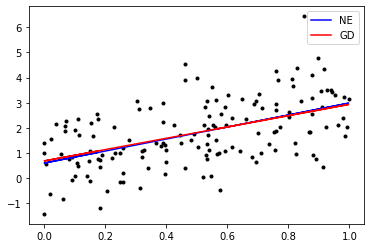

In [40]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()